In [1]:
import skeliner as sk

In [2]:
MESH_PATH = "../data/720575940545220339.obj"
mesh = sk.io.load_mesh(MESH_PATH)

In [3]:
skel = sk.skeletonize(mesh, 
    detect_soma=True,
    split_elongated_shells=True, 
    # --- post-processing parameters ---
    collapse_soma=True, 
    bridge_gaps=True, 
    prune_tiny_neurites=True, 
    verbose=True,
)

[skeliner] starting skeletonisation (636,684 vertices, 1,274,227 faces)
 ↳  build surface graph                          … 3.14 s
 ↳  bin surface vertices by geodesic distance    … 5.05 s
 ↳  compute bin centroids and radii              … 4.37 s
 ↳  post-skeletonization soma detection          … 0.18 s
      └─ Found soma at [951736.9, 1086828.0, 34163.9]
      └─ (r =  7597.7, 5381.7, 2745.9)
 ↳  map mesh faces to skeleton edges             … 0.47 s
 ↳  merge redundant near-soma nodes              … 0.46 s
      └─ 124 nodes merged into soma
      └─ Moved soma to [951508.1, 1086073.0, 34253.8]
      └─ (r =  8368.3, 5733.2, 2714.6)
 ↳  bridge skeleton gaps                         … 0.18 s
 ↳  build global minimum-spanning tree           … 0.12 s
 ↳  prune tiny neurites                          … 0.33 s
      └─ Pruned 599 nodes (599 edges).
TOTAL (soma + core + post)                       … 14.29 s (0.18 + 12.85 + 1.27)
(10,255 nodes, 10,254 edges)


(<Figure size 600x600 with 3 Axes>,
 {'B': <Axes: label='B', ylabel='z (µm)'>,
  'A': <Axes: label='A', xlabel='x (µm)', ylabel='y (µm)'>,
  'C': <Axes: label='C', xlabel='z (µm)'>})

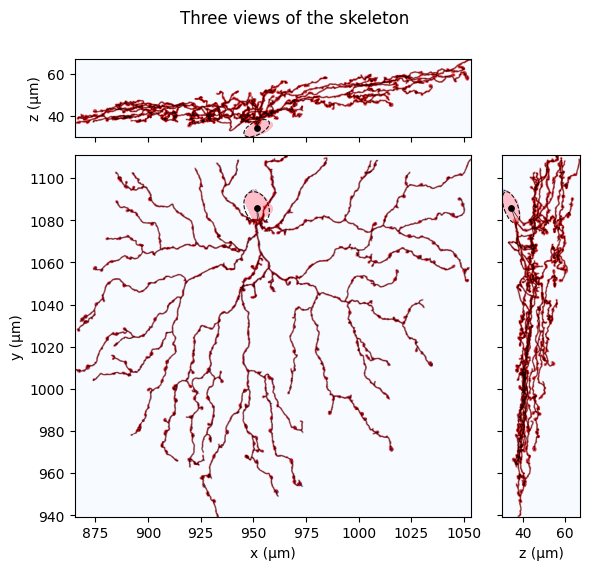

In [4]:
sk.plot3v(skel, mesh, scale=1e-3, unit="µm", planes=["xy", "xz", "zy"], 
          title="Three views of the skeleton",
          figsize=(6, 6))

In [5]:
%load_ext watermark
%watermark --time --date --timezone --updated --python --iversions --watermark

Last updated: 2025-05-26 12:38:35CEST

Python implementation: CPython
Python version       : 3.11.11
IPython version      : 9.2.0

skeliner: 0.1.0

Watermark: 2.5.0

